![Astrofisica Computacional](../../new_logo.png)

# Computational Astrophysics – Advanced Exercises

## Dr. rer. nat. Jose Ivan Campos Rozo<sup>1,2</sup>

1. Astronomical Institute of the Czech Academy of Sciences\
   Department of Solar Physics\
   Ondřejov, Czec Republic

2. Observatorio Astronómico Nacional\
   Facultad de Ciencias\
   Universidad Nacional de Colombia

e-mail: jicamposr@unal.edu.co & rozo@asu.cas.cz)

---

Jupyter Notebook: Introduction to Finite Differences

1. Introduction to Numerical Differentiation\
    The Finite Difference (FD) method is a cornerstone of numerical analysis, providing a robust framework for approximating derivatives. In computational physics and engineering, these approximations are indispensable for transforming differential equations —such as the Heat Equation or the Wave Equation— into algebraic systems solvable by computers.

    This technique traces its origins to Leonhard Euler in 1768. The fundamental principle is elegant in its simplicity: we estimate the slope of a function not by taking a limit, but by calculating the ratio of two differences over a finite, discrete interval.

    Definition: Finite Difference methods approximate the derivative of a function $f(x)$ at a specific point x_0 by using the values of the function at discrete grid points separated by a small, finite step size h.

    As we shall see, the choice of these points and the step size h dictates both the accuracy and the computational cost of our simulation.

2. Theoretical Foundation: Taylor Series Expansion\
    To rigorously assess the accuracy of numerical schemes, we rely on Taylor's Theorem. For a function f(x) that is sufficiently smooth, the value at a neighboring point can be expressed as a power series.

    Taylor's Theorem and Index Notation

    Let us define a uniform grid where $x_i$ is our point of interest, $x_{i+1} = x_i + h$, and $x_{i-1} = x_i - h$. We adopt the subscript notation common in grid-based simulations: $f_i \equiv f(x_i)$.

    According to Taylor's Theorem, for $f \in C^{n+1}$:\
    $f(x) = f(x_i) + f'(x_i)(x-x_i) + \frac{f''(x_i)}{2!}(x-x_i)^2 + \dots + \frac{f^{(n)}(x_i)}{n!}(x-x_i)^n + R_n(x)$\
    where $R_n(x)$ is the remainder term representing the truncation error.

    Deriving First-Order Schemes: $D_+$ and $D_-$

    Evaluating the expansion at $x_{i+1} = x_i + h$:\
    $f_{i+1} = f_i + hf'_i + \frac{h^2}{2!}f''_i + \frac{h^3}{3!}f'''_i + \mathcal{O}(h^4)$\
    Isolating $f'_i$ gives us the Forward Difference $(D_+)$:\
    $f'_i = \frac{f_{i+1} - f_i}{h} - \left[ \frac{h}{2}f''_i + \frac{h^2}{6}f'''_i + \dots \right]$\
    The term in brackets is our truncation error. Since the leading error term is proportional to $h$, we categorize this as a first-order scheme, denoted $\mathcal{O}(h)$.

    Similarly, evaluating the expansion at $x_{i-1} = x_i - h$:\
    $f_{i-1} = f_i - hf'_i + \frac{h^2}{2!}f''_i - \frac{h^3}{3!}f'''_i + \mathcal{O}(h^4)$\
    Rearranging yields the Backward Difference $(D_-)$:\
    $f'_i \approx \frac{f_i - f_{i-1}}{h}$\
    This scheme is also $\mathcal{O}(h)$, as the first neglected term is $-\frac{h}{2}f''_i$.

    The Centered Difference: $\mathcal{O}(h^2)$ Accuracy

    Superior accuracy is achieved by combining these expansions. If we subtract the expansion of $f_{i-1}$ from $f_{i+1}$:\
    $(f_i + hf'_i + \frac{h^2}{2}f''_i + \frac{h^3}{6}f'''_i + \dots) - (f_i - hf'_i + \frac{h^2}{2}f''_i - \frac{h^3}{6}f'''_i + \dots)$\
    The even-powered terms cancel out, leaving:\
    $f_{i+1} - f_{i-1} = 2hf'_i + \frac{2h^3}{3!}f'''_i + \mathcal{O}(h^5)$\
    Isolating $f'_i$ through algebraic division by $2h$:\
    $f'_i = \frac{f_{i+1} - f_{i-1}}{2h} - \frac{h^2}{6}f'''_i + \dots$\
    Because the leading error term is now $\mathcal{O}(h^2)$, the Centered Difference $(D_0)$ converges much faster as $h \to 0$ than its one-sided counterparts.



# Infografía
![Astrofisica Computacional](../../info_diff.png)

3. Setup: Importing Python Libraries\
    We utilize numpy for high-performance vectorized numerical operations and matplotlib for scientific visualization.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

4. Implementation: Finite Difference Schemes\
    We implement the schemes as Python functions. Note that these functions are designed to support NumPy broadcasting; if h or x is an array, the function returns an array of results without requiring explicit loops.

In [4]:
def forward_diff(f, x, h):
    """
    Computes the Forward Difference D+.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    """
    Computes the Backward Difference D-.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    """
    Computes the Centered Difference D0.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x + h) - f(x - h)) / (2 * h)

5. Practical Example: f(x) = \sin(x)

Let us evaluate these approximations for $f(x) = \sin(x)$ at $x_0 = 1.0$ (expressed in radians). The analytical derivative is $f'(x) = \cos(x)$, providing an exact baseline: $f'(1.0) \approx 0.540302$.

| Step Size (h) | Forward Error | Backward Error | Centered Error |
|---|---|---|---|
| 0.100 | 0.042939 | 0.041138 | 9.000537e-04 |
| 0.050 | 0.021257 | 0.020807 | 2.250978e-04 |
| 0.010 | 0.004216 | 0.004198 | 9.004993e-06 |
| 0.005 | 0.002106 | 0.002101 | 2.251257e-06 |
| 0.001 | 0.000421 | 0.000421 | 9.005045e-08 |


In [5]:
h_vals = np.array([0.1, 0.05, 0.01, 0.005, 0.001])
x0 = 1.0
f = np.sin
exact = np.cos(x0)

# Computing errors (utilizing vectorization for performance)
err_f = np.abs(exact - forward_diff(f, x0, h_vals))
err_b = np.abs(exact - backward_diff(f, x0, h_vals))
err_c = np.abs(exact - centered_diff(f, x0, h_vals))


6. Visualization: Error Analysis (Log-Log Plot)

To verify the order of accuracy, we analyze the relationship $E(h) \approx Ch^p$. In logarithmic space, this becomes $\log(E) \approx p\log(h) + \log|C|$. The slope p on a log-log plot directly indicates the order of accuracy.

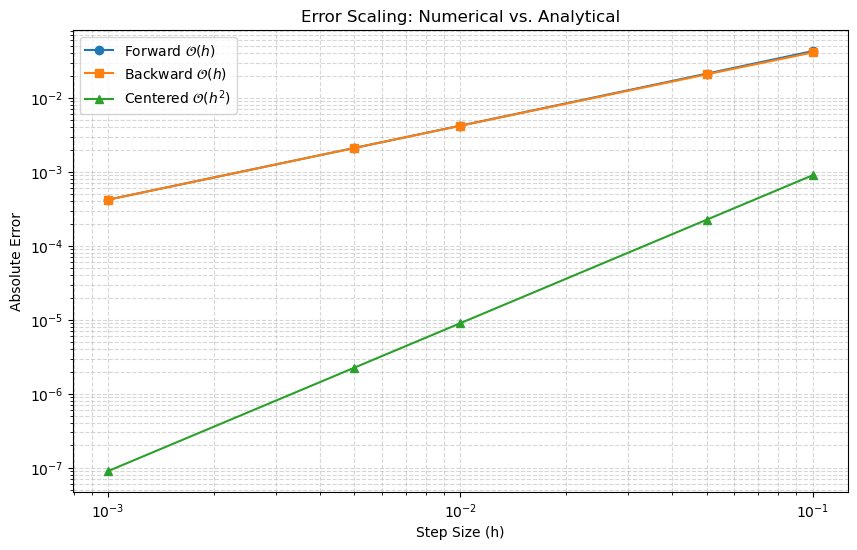

In [6]:
plt.figure(figsize=(10, 6))
plt.loglog(h_vals, err_f, '-o', label=r'Forward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_b, '-s', label=r'Backward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_c, '-^', label=r'Centered $\mathcal{O}(h^2)$')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.title('Error Scaling: Numerical vs. Analytical')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

Analyzing the slopes:

* Slope $\approx 1$: Confirms first-order accuracy $\mathcal{O}(h)$ for Forward and Backward schemes.
* Slope $\approx 2$: Confirms second-order accuracy $\mathcal{O}(h^2)$ for the Centered scheme.

7. Student Exercise: Second-Order Derivatives

We can extend the Taylor series method to approximate higher-order derivatives.

Derivation Skeleton: Consider the sum of the expansions for $f(x+h) and f(x-h)$:\
$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + \mathcal{O}(h^4) f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + \mathcal{O}(h^4)$\
By adding these two equations, notice how the odd-powered terms ($hf'$ and $\frac{h^3}{6}f''')$ cancel out:\
$f(x+h) + f(x-h) = 2f(x) + h^2f''(x) + \mathcal{O}(h^4)$

EXERCISE Task 1: Using the derivation above, isolate f''(x) and implement a Python function second_order_diff(f, x, h) based on the resulting formula:\ 
$f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$

EXERCISE Task 2: Verify the order of accuracy for f(x) = \sin(x) where the analytical second derivative is $f''(x) = -\sin(x)$. Plot the error on a log-log scale and use np.polyfit on the log-transformed data to calculate the exact slope. Does it equal 2?

8. References

* Leveque, R. J. (2007). Finite Difference Method for Ordinary and Partial Differential Equations: Steady State and Time-Dependent Problems. Society for Industrial and Applied Mathematics (SIAM), Philadelphia.
* Saad, Y. (2000). Iterative Methods for Sparse Linear Systems. PWS/ITP 1996. Online: http://www-users.cs.umn.edu/~saad/books.html.
* Burden, R., & Faires, J. D. (2010). Numerical Analysis. Cengage Learning; 9th edition.